In [13]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 20]
import random
import sys
import seaborn as sns
import pandas as pd
from collections import Counter

In [4]:
dataset = "Metaphors"
my_gene_to_age_dict = pickle.load(open("data/dataset_to_gene_to_age_dict.p","rb")) [dataset]
my_ages_list = list(my_gene_to_age_dict.values())
my_function_to_age_dict = pickle.load(open("data/function_to_age_%s_dict.p"%dataset,"rb"))

In [43]:
def get_data_in_dataframe(function_to_ages,ages_list,lq = None,mq=None,uq=None):
    if lq == None:
        len_list = [len(function_to_ages[func]) for func in function_to_ages]
        lq = np.percentile(len_list,25)
        mq = np.percentile(len_list,50)
        uq = np.percentile(len_list,75)
    
    data = [] #function, ages_list, mean, std, len, rand_mean, rand_std
    for func in function_to_ages:
        for my_type in ["func_grouped","random_grouped"]:
            curr = []
            ages = np.array(function_to_ages[func])

            #remove Nones
            ages = ages[ages != np.array(None)]
            if len(ages) == 0:
                continue

            if my_type == "func_grouped":
                curr.append(func)
                curr.append(ages)

                ages_counts = Counter(ages)
                ages_num_eras = len(ages_counts)
                curr.append(ages_num_eras)

                age_num_eras_more_than_1_over_num_eras_plus1 = 0 # significant eras
                for age in ages_counts:
                    if ages_counts[age] > len(ages)/(ages_num_eras+1):
                        age_num_eras_more_than_1_over_num_eras_plus1 +=1
                curr.append(age_num_eras_more_than_1_over_num_eras_plus1)

            else: #random
                curr.append("no_func_name")
                ages_list = np.array(ages_list)
                ages_list = ages_list[ages_list != np.array(None)]
                rand_ages = np.array(random.sample(list(ages_list),len(ages)))
                curr.append(rand_ages)
                
                rand_ages_counts = Counter(rand_ages)
                rand_ages_num_eras = len(rand_ages_counts)
                curr.append(rand_ages_num_eras)

                rand_age_num_eras_more_than_1_over_num_eras_plus1 = 0
                for rand_age in rand_ages_counts:
                    if rand_ages_counts[rand_age] > len(rand_ages)/(rand_ages_num_eras+1):
                        rand_age_num_eras_more_than_1_over_num_eras_plus1 += 1
                curr.append(rand_age_num_eras_more_than_1_over_num_eras_plus1)
        
            curr.append(len(ages))
            curr.append(my_type)
            
            if len(ages) < lq:
                curr.append("Less Than %d Genes"%lq)
            elif len(ages) < mq:
                curr.append("Less Than %d Genes"%mq)
            elif len(ages) < uq:
                curr.append("Less Than %d Genes"%uq)
            else:
                curr.append("Largest Gene Sets")
            
            
            data.append(curr)
        
        
    df = pd.DataFrame(data)
    df.columns = ['function_name','ages_list',
                  'age_num_eras','age_num_eras_more_than_1_over_num_eras_plus1','num_els','Type','GeneSet']
    return df

In [44]:
df = get_data_in_dataframe(my_function_to_age_dict,my_ages_list)
df

,function_name,ages_list,age_num_eras,age_num_eras_more_than_1_over_num_eras_plus1,num_els,Type,GeneSet
0,GO:0005967~mitochondrial pyruvate dehydrogenas...,"[0.5714285714285714, 0.5714285714285714, 0.857...",2,1,3,func_grouped,Less Than 6 Genes
1,no_func_name,"[0.5714285714285714, 0.0, 0.2857142857142857]",3,3,3,random_grouped,Less Than 6 Genes
2,GO:0031235~intrinsic component of the cytoplas...,"[0.42857142857142855, 0.5714285714285714, 0.57...",3,2,7,func_grouped,Less Than 10 Genes
3,no_func_name,"[0.42857142857142855, 0.7142857142857143, 0.57...",5,1,7,random_grouped,Less Than 10 Genes
4,repeat:Solcar 2,"[0.5714285714285714, 0.5714285714285714, 0.571...",3,1,31,func_grouped,Largest Gene Sets
5,no_func_name,"[0.2857142857142857, 0.5714285714285714, 1.0, ...",7,3,31,random_grouped,Largest Gene Sets
6,Glycogen metabolism,"[0.2857142857142857, 0.5714285714285714, 0.142...",3,2,8,func_grouped,Less Than 10 Genes
7,no_func_name,"[0.42857142857142855, 0.14285714285714285, 0.2...",4,3,8,random_grouped,Less Than 10 Genes
8,GO:0005524~ATP binding,"[0.5714285714285714, 0.5714285714285714, 0.714...",8,3,1090,func_grouped,Largest Gene Sets
9,no_func_name,"[0.5714285714285714, 0.2857142857142857, 0.571...",8,2,1090,random_grouped,Largest Gene Sets


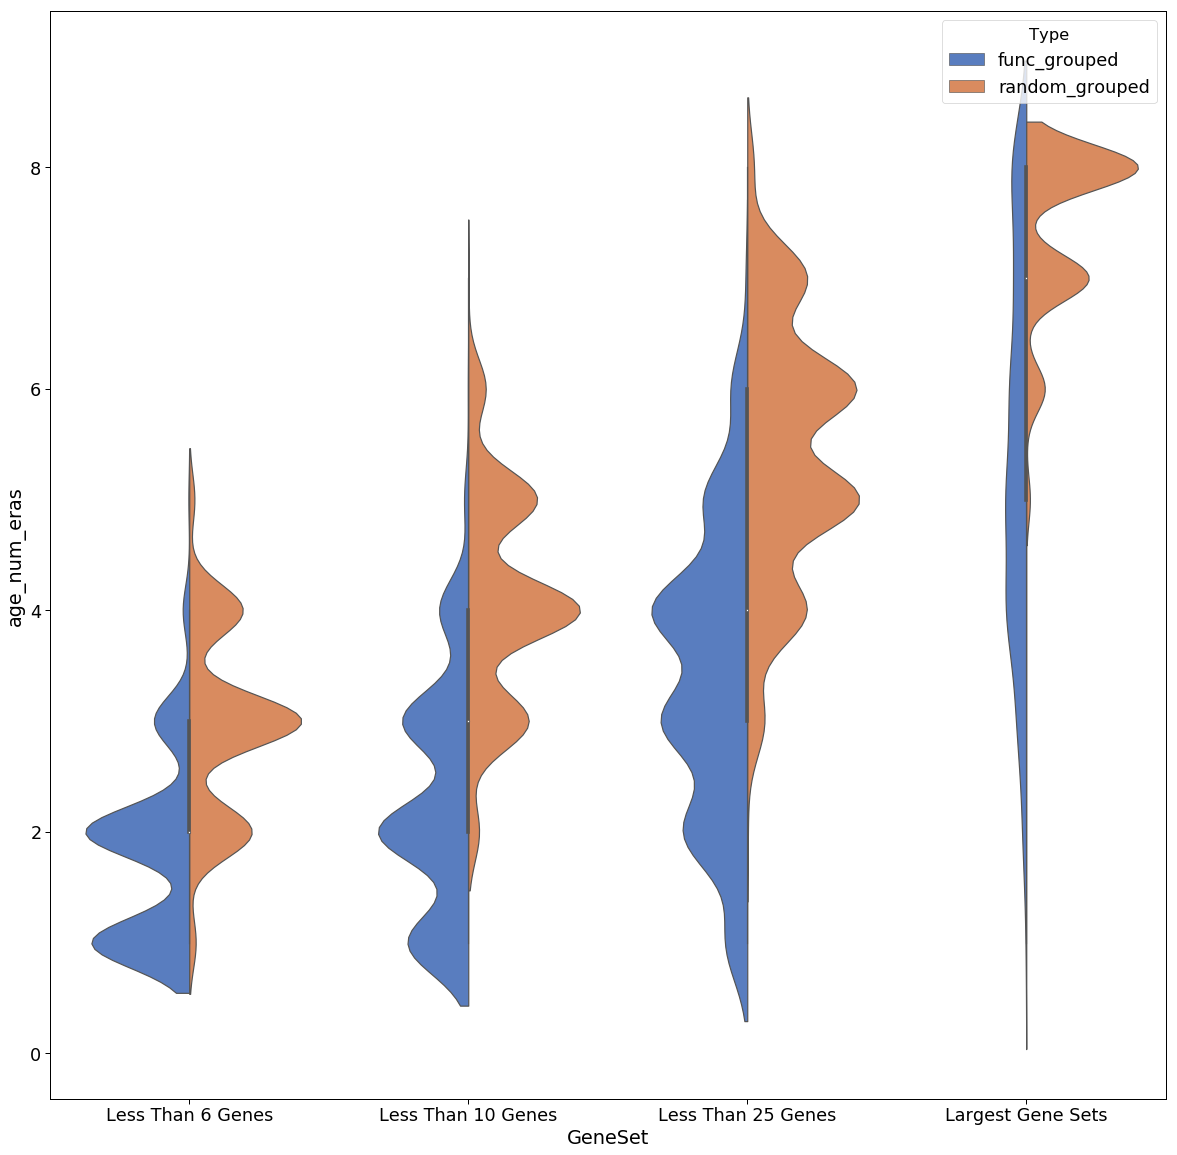

In [50]:
#PLOT VIOLIN OF number of "eras" GROUPED BY SET SIZE
len_list = [len(my_function_to_age_dict[func]) for func in my_function_to_age_dict]
lq = np.percentile(len_list,25)
mq = np.percentile(len_list,50)
uq = np.percentile(len_list,75)
        
v_df = df[["GeneSet","age_num_eras", "Type"]]
sns.set_context("paper",font_scale = 2)
ax = sns.violinplot(x="GeneSet",y="age_num_eras",data=v_df,order = ["Less Than %d Genes"%lq,"Less Than %d Genes"%mq ,"Less Than %d Genes"%uq,"Largest Gene Sets"],hue="Type",palette="muted",split=True)
plt.show()

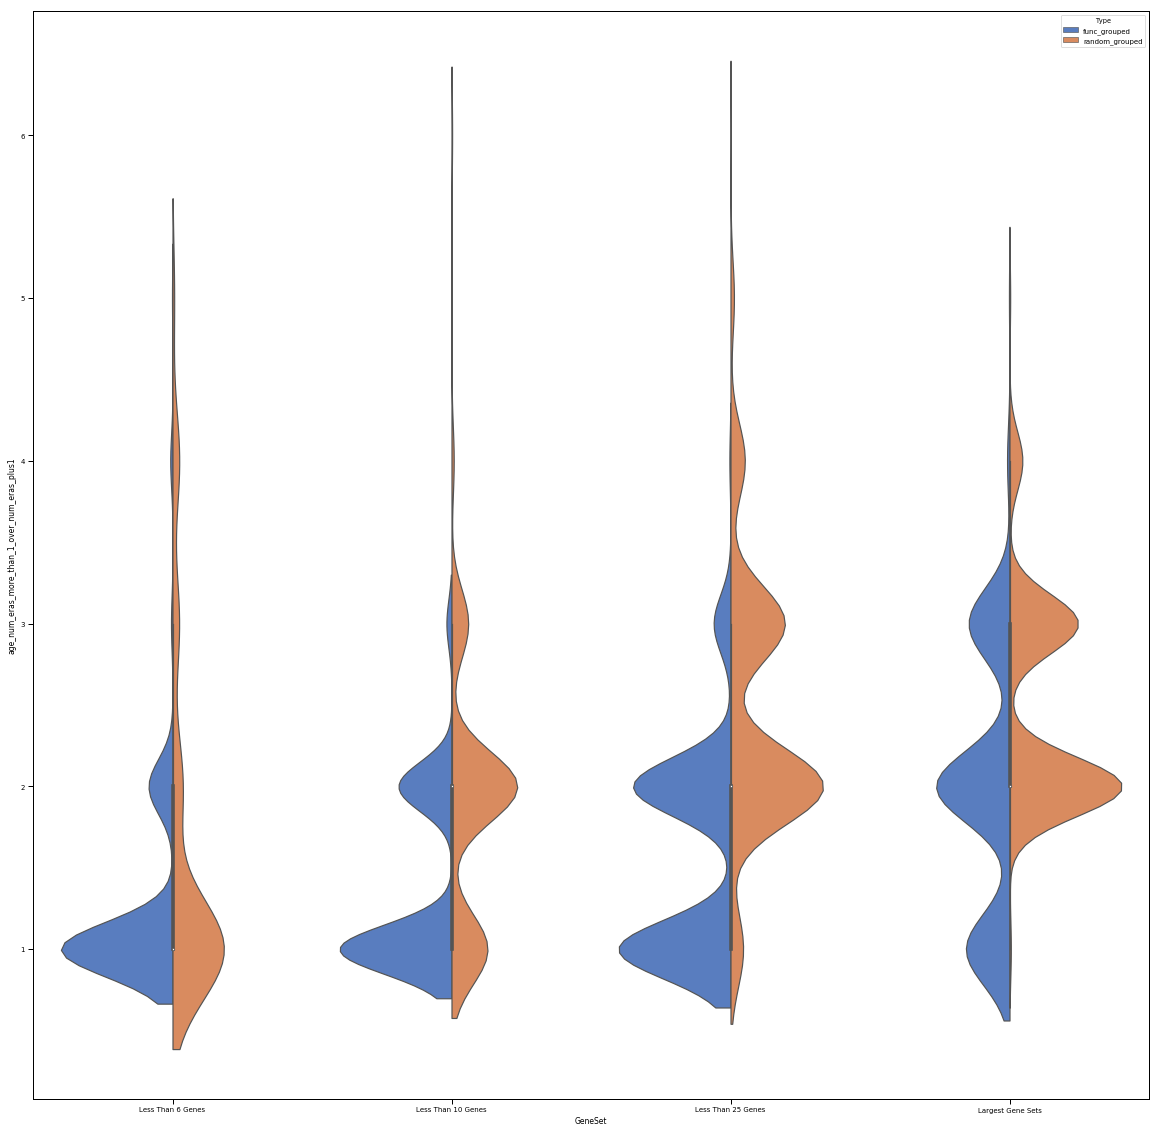

In [47]:
#PLOT VIOLIN OF number of "significant eras" GROUPED BY SET SIZE
len_list = [len(my_function_to_age_dict[func]) for func in my_function_to_age_dict]
lq = np.percentile(len_list,25)
mq = np.percentile(len_list,50)
uq = np.percentile(len_list,75)
        
v_df = df[["GeneSet","age_num_eras_more_than_1_over_num_eras_plus1", "Type"]]
sns.set_context("paper",font_scale = 0.8)
ax = sns.violinplot(x="GeneSet",y="age_num_eras_more_than_1_over_num_eras_plus1",data=v_df,order = ["Less Than %d Genes"%lq,"Less Than %d Genes"%mq ,"Less Than %d Genes"%uq,"Largest Gene Sets"],hue="Type",palette="muted",split=True)
plt.show()